In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Q.1)

In [2]:
ship_data = pd.read_csv("D:\\VS code\\datasets\\ship_fuel_efficiency.csv")
ship_data

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61
...,...,...,...,...,...,...,...,...,...,...
1435,NG120,Fishing Trawler,Port Harcourt-Lagos,August,63.84,Diesel,1633.85,4852.28,Stormy,75.88
1436,NG120,Fishing Trawler,Lagos-Apapa,September,61.43,HFO,1263.48,3571.13,Calm,78.00
1437,NG120,Fishing Trawler,Port Harcourt-Lagos,October,193.09,HFO,4661.63,12267.13,Stormy,79.67
1438,NG120,Fishing Trawler,Lagos-Apapa,November,166.50,Diesel,4298.00,12297.71,Moderate,92.87


In [3]:
ship_data.columns

Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency'],
      dtype='object')

In [4]:
ship_avgtyp1= ship_data.groupby(['ship_type','weather_conditions'])['engine_efficiency'].mean().reset_index()
ship_avgtyp2= ship_data.groupby(['ship_type','weather_conditions'])['distance'].mean().reset_index()

In [5]:
px.bar(ship_avgtyp1,x='ship_type',y='engine_efficiency',color='weather_conditions',barmode='group')


In [6]:
px.bar(ship_avgtyp2,x='ship_type',y='distance',color='weather_conditions',barmode='group')

### Q.2) Generate the following graphs and arrange them as a dashboard in subploat format : a)box plot for fuel consumption and CO2 emission b) month wise CO2 emission c)plot the regression graph for distance against fuel consumption

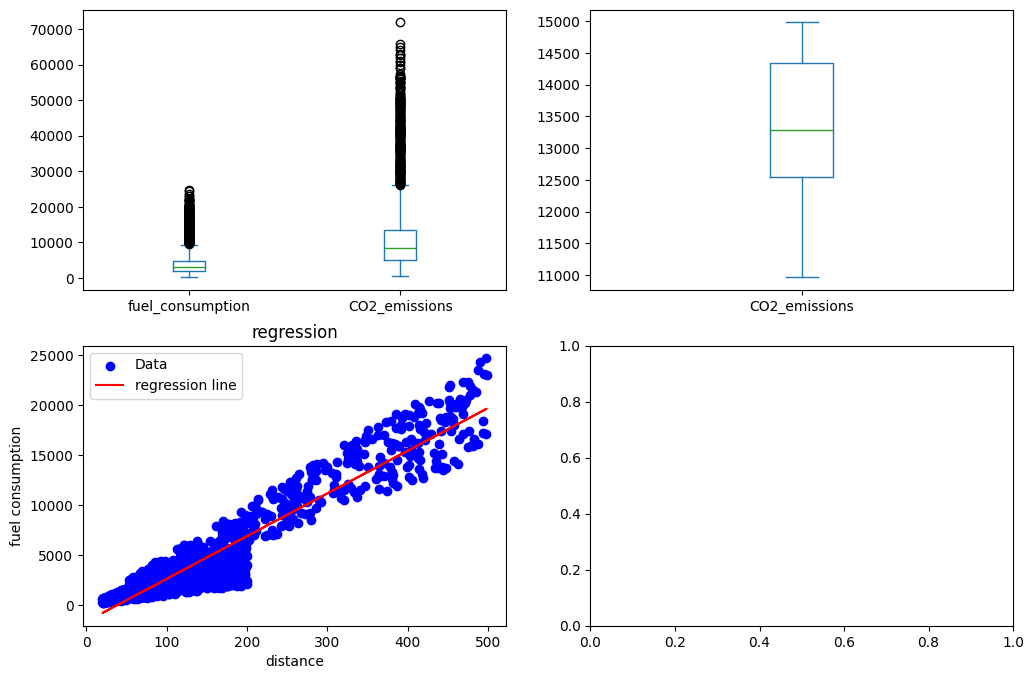

In [37]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
ship_data[['fuel_consumption','CO2_emissions']].plot(kind='box',ax=axes[0,0])
ship_data.groupby('month')['CO2_emissions'].mean().plot(kind='box',ax=axes[0,1])

axes[1,0].scatter(ship_data['distance'],ship_data['fuel_consumption'],label='Data',color='blue')
m, b =np.polyfit(ship_data['distance'],ship_data['fuel_consumption'],1)  #regression line
axes[1,0].plot(ship_data['distance'],m*ship_data['distance'] + b,color='red',label='regression line')
axes[1,0].set_title('regression')
axes[1,0].set_xlabel('distance')
axes[1,0].set_ylabel('fuel consumption')
axes[1,0].legend()
plt.show()


### Q.3) a)which is the longest route b)which ship is is done maximum service

In [7]:
ship_data.head(3)

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61


In [13]:
ship_data.groupby(['route_id'])['distance'].max().idxmax()

'Lagos-Apapa'

In [12]:
ship_data.groupby(['ship_id'])['engine_efficiency'].max().idxmax()

'NG086'

### Q.4) Perform the descriptive statistics and conclude the data

In [13]:
ship_data.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [14]:
ship_data.tail()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
1435,NG120,Fishing Trawler,Port Harcourt-Lagos,August,63.84,Diesel,1633.85,4852.28,Stormy,75.88
1436,NG120,Fishing Trawler,Lagos-Apapa,September,61.43,HFO,1263.48,3571.13,Calm,78.00
1437,NG120,Fishing Trawler,Port Harcourt-Lagos,October,193.09,HFO,4661.63,12267.13,Stormy,79.67
1438,NG120,Fishing Trawler,Lagos-Apapa,November,166.50,Diesel,4298.00,12297.71,Moderate,92.87
1439,NG120,Fishing Trawler,Warri-Bonny,December,127.66,Diesel,3549.91,10641.90,Moderate,90.82


In [15]:
ship_data.describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


In [ ]:
# the mean distance is 151.753354 and minimum distance is 20.080000
# the mean fuel_consumption is 4844.246535 and minimum distance is 237.880000
# the mean CO2_emissions is 13365.454882 and minimum distance is 615.680000

In [24]:
ship_data.groupby(['fuel_type'])['fuel_consumption'].max()

fuel_type
Diesel    24648.52
HFO       23503.71
Name: fuel_consumption, dtype: float64

In [ ]:
# Diesel ships consume more fuel

In [21]:
ship_data.groupby(['ship_type'])['distance'].max()

ship_type
Fishing Trawler     199.96
Oil Service Boat    149.95
Surfer Boat         199.91
Tanker Ship         498.55
Name: distance, dtype: float64

In [22]:
# Tanker ship cover more distance

In [25]:
ship_data.groupby(['fuel_type'])['CO2_emissions'].max()


fuel_type
Diesel    71871.21
HFO       65937.46
Name: CO2_emissions, dtype: float64

In [ ]:
#diesel ships have more CO2 emission 

### Q.5) Which Fuel type covers more distance in less CO2 emission

In [34]:
ship_data.groupby(['fuel_type']).max()['distance'].idxmax()  and ship_data.groupby(['fuel_type']).min()['CO2_emissions'].idxmax()

'HFO'